# **Pertemuan 14 - Conditional Expectations and Variance**

Introduction to Probability Course - Sekolah Data - Pacmann Academy

**Outline**

1. Review Conditional Expectations and Variance
2. Sum of a Random Number of Independent Random Variables
3. Case 1: Mengirimkan pesan
4. Case 2: Memotong Tali
5. Case 3: Berbelanja di Mall

## **Conditional Expectatitions and Variance**
---

### **Conditional Expectation**

Dari materi yang sudah dipelajari di video:

- Expectation atau Expected Value adalah **rata rata** nilai dari Variable Random
- Misal $X$ dan $Y$ adalah variabel random, **Conditional Expectation** $X$ jika diketahui $Y$ bernilai $y$ dapat dihitung dengan: 
$$\text{E}[X | Y]= \sum_x{p_{X | Y}(x | y)}$$
- Unconditional expected value dapat dicari melalui **Total Expectation Theorem**
$$\text{E}[X]= \sum_y{p_{Y}(y)\text{E}[X | Y = y]}$$

### **Conditional Variance**
- Variance adalah nilai kuadrat dari rata rata sebaran nilai variable random dari rata-ratanya (expected value)
- Variance merepresentasikan persebaran data
- Variance sulit untuk diinterpretasikan, gunakan standar deviasi untuk memudahkan interpretasi dalam skala data asli
- Variance dari Variable Random bisa dicari dengan menghitung:
$$ \text{Var}(X) = \text{E}[(X-\text{E}[X])^2]$$
- Misal $X$ dan $Y$ adalah variabel random, **Conditional Variance** $X$ jika diketahui $Y$ bernilai $y$ dapat dihitung dengan: 
$$\text{Var}(X | Y = y)=\text{E}[(X-\text{E}[X | Y = y])^2 | Y = y] $$
- Unconditional variance dapat dicari menggunakan **Law of Conditional Variances**
$$\text{Var}(X) = \text{E}[\text{Var}(X | Y)]+\text{Var}(\text{E}[X | Y])$$

### **Sum of a Random Number of Independent Random Variables**

In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [3]:
import pandas as pd
import numpy as np
import itertools
import random
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from src.module_python_14 import expectation_visualization

## **Study Case 1** : Mengirimkan pesan
___

Sebuah pesan dikirimkan oleh komputer yang berlokasi di Bandung menggunakan jaringan ditujukan ke Jakarta, Surabaya, dan Malang memiliki probabilitas secara berurutan:
- Jakarta 0.5
- Surabaya 0.3
- Malang 0.2 

Waktu Transit Pesan bernilai random. Rata-rata dari waktu transit: 
- Jakarta 0.05
- Surabaya  0.1
- Malang 0.3

Berapa **expected value** dari **Waktu Transit Pesan (WTP)**?

Pertama, kita definisikan array dari probabilitas,

In [4]:
prob = [0.5, 0.3, 0.2]

Kemudian, kita definisikan array rata-rata dari waktu transit pesan secara berurutan

In [5]:
conditional_exp = [0.05, 0.1, 0.3]

Selanjutnya, kita definisikan fungsi utk menghitung unconditional expected value menggunakan **total expectation theorem**

In [6]:
TotalExp = (0.5*0.05)+(0.3*0.1)+(0.2*0.3)

In [7]:
TotalExp

0.11499999999999999

Maka, **expected value dari waktu transit pesan adalah 0.115**

Nilai yang sama akan kita dapatkan jika mencari rata rata waktu transitnya jika kita mengetahui keseluruhan datanya

|Tujuan|Waktu Transit (s)|
|-|-|
|Jakarta|0.05
|Jakarta|0.03
|Jakarta|0.07
|Jakarta|0.09
|Jakarta|0.01
|Surabaya|0.1
|Surabaya|0.17
|Surabaya|0.03
|Malang|0.31
|Malang|0.29


In [8]:
mean = (0.05+0.03+0.07+0.09+0.01+0.1+0.17+0.03+0.31+0.29)/10
mean

0.11500000000000002

## **Study Case 2: Memotong Tali**
___

Misalkan anda memiliki tali sepanjang *l* yang panjang nya berkisar 0 - 1000 cm.
Teman anda, sambil menutup mata, diminta untuk memotong tali yang anda miliki.
Sebut lokasi potongan tersebut adalah Y.
Kemudian, tali tersebut akan diambil salah satu bagiannya. Sehingga, didapat tali sepanjang y. 
Dari sisa tali tersebut, akan dipotong kembali secara random. Lokasi potongannya adalah X.

#### Generate panjang 1 tali

In [9]:
np.random.seed(0)
L = np.random.uniform(0,1000,size = 1)
L

array([548.81350393])

#### Cek panjang tali

In [10]:
L[0]

np.float64(548.8135039273247)

#### Potong tali tersebut di titik Y

In [11]:
Y = random.uniform(0,float(L[0])) 
Y

109.23740943556531

#### Potong tali yang di pilih di titik X

In [12]:
X = random.uniform(0,float(Y))
X

105.07308607503417

- panjang tali X bergantung pada tali y yang sebelumnya di potong
- panjang tali X tidak mungkin melebihi nilai y

Sekarang coba simulasikan jika ada 100 tali dan kita lakukan skenario yang sama pada 100 tali tersebut

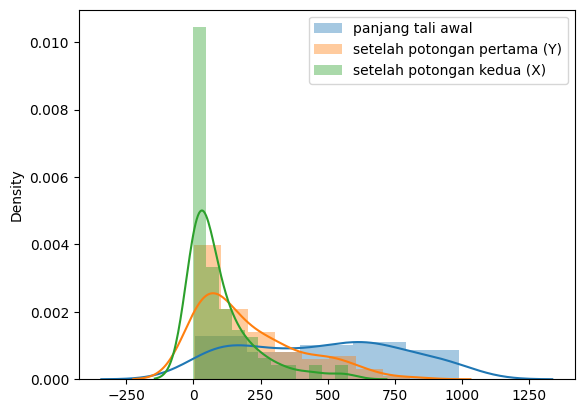

In [13]:
# simulasi program
# misal panjang l berada di angka antara 0 dan 1000 dan akan dipotong pada Y

N = 100 # banyaknya tali

L = np.random.uniform(0,1000,size = N) # generate nilai random yang menyatakan panjang 100 tali, dgn asumsi berdistribusi uniform

sns.distplot(L, label = "panjang tali awal") # plot distribusi L warna biru

X_list = [] # definisikan array utk X
Y_list = [] # definisikan array utk Y

for i in range(N): 
    
    # potong tali secara random dengan panjang Y
    Y = random.uniform(0,float(L[i]))
    
    # simpan nilai y untuk masing2 tali
    Y_list.append(Y)
    
    # potong kembali tali secara random di X
    X = random.uniform(0,float(Y))

    # simpan nilai x untuk masing2 y
    X_list.append(X)
    
# visualisasi
sns.distplot(Y_list, label = "setelah potongan pertama (Y)") # warna orange
sns.distplot(X_list, label = "setelah potongan kedua (X)") # warna hijau
plt.legend()
plt.show()

#### Coba hitung rata rata nilai X

In [14]:
np.mean(X_list)

np.float64(96.55220520136507)

ingat bahwa value pada X_list bergantung pada Y, maka np.mean(X_list) adalah E[E[X|Y]]

#### Rata rata nilai Y

In [15]:
np.mean(Y_list)

np.float64(203.29994263985546)

#### Rata rata nilai L

In [16]:
np.mean(L)

np.float64(474.0838698412066)

Untuk menentukan expected value panjang X, kita juga dapat menggunakan **law of iterated expectation**

Berdasarkan materi pada video, akan diperoleh nilai $E[X]=E[E[X|Y]]=\frac{l}{4}$.
Mari kita cocokkan

In [17]:
# rata rata dari panjang tali (L) dibagi 4
mean_L = np.mean(L)
mean_L/4

np.float64(118.52096746030165)

In [18]:
print(f"Hasil dari perhitungan rata rata X_list {np.mean(X_list)}")
print(f"Hasil dari law of iterated expectation {mean_L/4}")

Hasil dari perhitungan rata rata X_list 96.55220520136507
Hasil dari law of iterated expectation 118.52096746030165


- nilai `np.mean(X_list)` dan `mean_L/4` memiliki selisih yang tipis, 
- maka terbukti bahwa law of iterated expectation digunakan untuk mencari unconditional expectation jika diketahui conditional expectationnya.

Visualisasi rata rata panjang tali X dan panjang tali awalnya

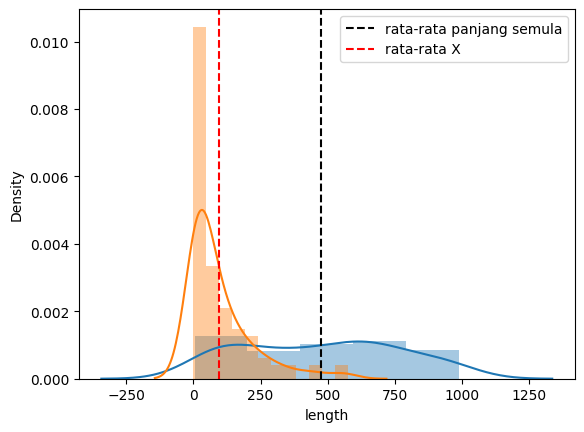

In [19]:
expectation_visualization(L, X_list)

## **Study Case 3: Berbelanja di Mall**
---

Anda pergi ke sebuah mall dengan membawa sejumlah uang. 
Disana, anda ingin berkunjung ke berbagai toko. 
Anda membawa **sejumlah random uang** dan **belum memiliki daftar toko** untuk dituju maupun barang yang ingin dibeli. 
Satu hal yang pasti, anda ingin berbelanja. 
Dapatkah anda menentukan estimasi uang yang akan anda habiskan? 

Pada kasus ini, 
- Jumlah toko akan dimisalkan sebanyak $N$
- Uang yang anda habiskan akan dimisalkan sebagai variabel random $Y$
- Uang yang anda belanjakan pada toko ke - $N$ akan dimisalkan sebagai $X_N$

In [20]:
N = random.randint(0,100) # banyaknya toko

X = np.random.uniform(0,1000,size = int(N)) # generate uang yang ingin dihabiskan diantara 0-1000 ke N toko dgn asumsi dist. uniform

Y = sum(X) # y adalah jumlahan seluruh uang yang dihabiskan disetiap tokonya

print(f"Anda ke {N} toko")
print(f"Dengan total uang yang anda belanjakan: {Y}")

Anda ke 1 toko
Dengan total uang yang anda belanjakan: 270.00797319216485


In [21]:
pd.DataFrame(X, columns=["Uang yang dihabiskan"])

,Uang yang dihabiskan
0,270.007973


In [22]:
print(f"Rata rata uang yang anda belanjakan disetiap tokonya: {X.mean()}")

Rata rata uang yang anda belanjakan disetiap tokonya: 270.00797319216485


Distribusi uang yang dihabiskan

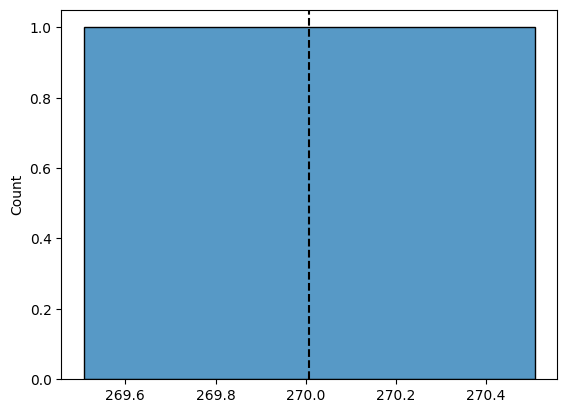

In [23]:
sns.histplot(X) # plot distribusi X warna biru
plt.axvline(X.mean(), color="k", linestyle="--") # plot nilai rata rata X 

Untuk menentukan expected value Y, berdasarkan video materi, kita dapat menggunakan **total expectation theorem** atau **law of iterated expectation**.
Akan dibuktikan bahwa keempat value yang ada di video bernilai sama.

$$ \text{E}[Y|N=n] = n \times \text{E}[X] $$

In [24]:
exp_y = N*np.mean(X)
exp_y

np.float64(270.00797319216485)

$$ \text{E}[Y] = \sum_n p_n(n) \times \text{E}[Y|N=n] $$
$$ \text{E}[Y] = \sum_n p_n(n) \times n \times \text{E}[X] $$

In [25]:
prob_N = X/Y 

In [26]:
pd.DataFrame({"Uang yang dihabiskan":X, 
              "Peluang uang dihabiskan di toko ke-i (p_n)":X/Y})

,Uang yang dihabiskan,Peluang uang dihabiskan di toko ke-i (p_n)
0,270.007973,1.0


In [27]:
exp_y = sum(prob_N)*N*np.mean(X)
exp_y

np.float64(270.00797319216485)

Law of iterated expectation

$$ \text{E}[Y] = \sum_n p_n(n) \times n \times \text{E}[X] $$

In [28]:
print(np.mean(N*(np.mean(X))))

270.00797319216485


Total Expectation Theorem

$$\text{E}[Y]= \text{E}[X]\text{E}[N]$$

In [29]:
print(np.mean(X)*np.mean(N))

270.00797319216485


Sebab bernilai sama, maka kita dapat menghitung estimasi uang yang dihabiskan (expected value) baik menggunakan **total expectation theorem** atau **law of iterated expectation**.